Question 1:

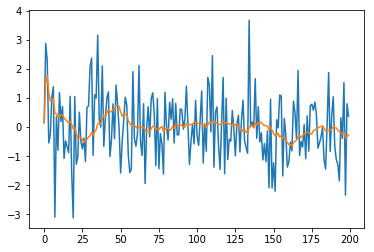

In [18]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

L=200
random_generator = [np.random.randn() for i in range(L)] 
window_lenght = 20
x = []
for i in range(len(random_generator)):
    s = 0
    n = 0
    for j in range(window_lenght):
        if i-j < 0:
            break;
        
        s = s + random_generator[i-j]
        n = n + 1
    x.append(s/n)#Moving average values

plt.plot(random_generator)
plt.plot(x)
plt.show()

Question 2:

European Call Option:

In [19]:
import numpy as np

def EuropeanBinomialCall(S,K,T,r,sigma,n=100):
    deltaT = T/n
    u = np.exp(sigma * np.sqrt(deltaT))
    d = 1.0 / u
    a = np.exp(r * deltaT)
    p = (a - d) / (u - d)
    v = [[0.0 for j in range(i+1)] for i in range(n+1)]
    for j in range (n+1):#filling the last nodes of the tree
        v[n][j]=max(S*u**j*d**(n-j)-K,0.0)
    for i in range(n-1, -1, -1):#going backwards
        for j in range(i + 1):
            v[i][j]=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j]) #filling the nodes
    return v[0][0]

In [20]:
EuropeanBinomialCall(100,120,5,0.1,0.05)

27.219196425361403

European Put Option:

In [22]:
import numpy as np

def EuropeanBinomialPut(S,K,T,r,sigma,n=100):
    deltaT = T/n
    u = np.exp(sigma * np.sqrt(deltaT))
    d = 1.0 / u
    a = np.exp(r * deltaT)
    p = (a - d) / (u - d)
    v = [[0.0 for j in range(i+1)] for i in range(n+1)]
    for j in range (n+1):#filling the last nodes of the tree
        v[n][j]=max(-S*u**j*d**(n-j)+K,0.0)
    for i in range(n-1, -1, -1):#going backwards
        for j in range(i + 1):
            v[i][j]=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j]) #filling the nodes
    return v[0][0]
print (EuropeanBinomialCall(100,120,5,0.1,0.05))
print (EuropeanBinomialPut(100,120,5,0.1,0.05))

27.2191964254
0.00287559087844


American Call Option:

In [23]:
import numpy as np
def AmericanBinomialCall(s,x,T,r,sigma,n=100):
    deltaT=T/n
    u=np.exp(sigma * np.sqrt(deltaT))
    d=1.0 / u
    a = np.exp(r*deltaT)
    p=(a-d) / (u-d)
    v = [[0.0 for j in range(i + 1)] for i in range (n+1)]
    for j in range(n+1):
        v[n][j] = max(s* u**j * d**(n-j)-x,0.0)
    for i in range(n-1,-1,-1):
        for j in range(i + 1):
            v1=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
            v2=max(s-x,0)
            v[i][j]=max(v1,v2)
    return v[0][0]

In [24]:
AmericanBinomialCall(100,120,5,0.1,0.05)

27.219196425361403

American Put Option:

In [29]:
import numpy as np
def AmericanBinomialPut(s,x,T,r,sigma,n=100):
    deltaT=T/n
    u=np.exp(sigma * np.sqrt(deltaT))
    d=1.0 / u
    a = np.exp(r*deltaT)
    p=(a-d) / (u-d)
    v = [[0.0 for j in range(i + 1)] for i in range (n+1)]
    for j in range(n+1):
        v[n][j] = max(-s* u**j * d**(n-j)+x,0.0)
    for i in range(n-1,-1,-1):
        for j in range(i + 1):
            v1=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
            v2=max(x-s,0)
            v[i][j]=max(v1,v2)
    return v[0][0]
print(AmericanBinomialCall(100,120,5,0.1,0.05))
print(AmericanBinomialPut(100,120,5,0.1,0.05))

27.2191964254
20


Bermudan Call Option:

Question 3: